**Imports and load data**

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Seasons_stats_complete.csv")
len(data)
data.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

**Data Cleaning**

Replace field name 'Unnamed: 0' with 'id'

In [3]:
data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
data.columns


Index(['id', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS'],
      dtype='object')

Remove null players

In [4]:
data = data[~data.Player.isnull()]
print (len(data[data.Player == 0])) # Check if empty

0


Remove datapoints with team 'TOT' (occurs when player changes team mid season) 

In [5]:
data = data[data.Tm != 'TOT']
print (len(data[data.Tm == 'TOT'])) # Check if empty

0


Filter players with at least 800 min in a season and played at least half of the matches

In [6]:
data = data[(data.MP > 800) & (data.G > 40)]
print (len(data[(data.MP < 800) | (data.G < 40)])) # Check if empty

0


**Feature Addition**

Add 'per game' stats

In [7]:
data['PPG'] = data['PTS'] / data['G']
data['APG'] = data['AST'] / data['G']
data['RPG'] = data['TRB'] / data['G']
data['SPG'] = data['STL'] / data['G']
data['BPG'] = data['BLK'] / data['G']
data['FPG'] = data['PF'] / data['G']
data['TOVPG'] = data['TOV'] / data['G']
data.columns

Index(['id', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PPG', 'APG', 'RPG', 'SPG', 'BPG', 'FPG', 'TOVPG'],
      dtype='object')

Add MVP labels

In [8]:
# mvp_players = {'Shaquille O\'Neal*': [2000],
#                   'Allen Iverson*': [2001],
#                   'Tim Duncan': [2002, 2003],
#                   'Kevin Garnett': [2004],
#                   'Steve Nash': [2005, 2006],
#                   'Dirk Nowitzki': [2007],
#                   'Kobe Bryant': [2008],
#                   'LeBron James': [2009, 2010, 2012, 2013],
#                   'Derrick Rose': [2011],
#                   'Kevin Durant': [2014],
#                   'Stephen Curry': [2015, 2016],
#                   'Russell Westbrook': [2017],
#                   'James Harden': [2018],
#                   'Giannis Antetokounmpo': [2019]}

mvp_players = {'Kareem Abdul-Jabbar*': [1980],
                  'Moses Malone*': [1982, 1983],
                  'Julius Erving*': [1981],
                  'Larry Bird*': [1984, 1985, 1986],
                  'Magic Johnson*': [1987, 1989, 1990],
                  'Michael Jordan*': [1988, 1991, 1992, 1996, 1998],
                  'Charles Barkley*': [1993],
                  'Hakeem Olajuwon*': [1994],
                  'David Robinson*': [1995],
                  'Karl Malone*': [1997, 1999],
                  'Shaquille O\'Neal*': [2000],
                  'Allen Iverson*': [2001],
                  'Tim Duncan': [2002, 2003],
                  'Kevin Garnett': [2004],
                  'Steve Nash': [2005, 2006],
                  'Dirk Nowitzki': [2007],
                  'Kobe Bryant': [2008],
                  'LeBron James': [2009, 2010, 2012, 2013],
                  'Derrick Rose': [2011],
                  'Kevin Durant': [2014],
                  'Stephen Curry': [2015, 2016],
                  'Russell Westbrook': [2017],
                  'James Harden': [2018],
                  'Giannis Antetokounmpo': [2019]}
data['MVP'] = 0
for i, row in data.iterrows():  
    for k, v in mvp_players.items():
        for year in v:
            if row['Player'] != k:
                break
            elif(row['Year'] == year) & (row['Player'] == k):
                data.loc[i, 'MVP'] = 1
                break
if len(data.Year.unique()) == len(data[data.MVP == True]):
  print ("Check!")

Add team wins

Starts with the year 2000

In [9]:
data = data[data.Year >= 2000]
data.head() # Check first 5 entries

,id,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,PF,PTS,PPG,APG,RPG,SPG,BPG,FPG,TOVPG,MVP
14471,14471,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,1205.0,14.4,0.484,...,116.0,563.0,12.239130,1.565217,5.195652,1.152174,0.347826,2.521739,1.891304,0
14473,14473,2000.0,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,3223.0,20.2,0.547,...,244.0,1663.0,20.280488,3.304878,10.060976,1.085366,1.060976,2.975610,3.036585,0
14475,14475,2000.0,Ray Allen,SG,24.0,MIL,82.0,3070.0,20.6,0.570,...,187.0,1809.0,22.060976,3.756098,4.378049,1.341463,0.231707,2.280488,2.231707,0
14477,14477,2000.0,John Amaechi,C,29.0,ORL,80.0,1684.0,13.2,0.505,...,161.0,836.0,10.450000,1.187500,3.325000,0.437500,0.462500,2.012500,1.737500,0
14478,14478,2000.0,Derek Anderson,SG,25.0,LAC,64.0,2201.0,16.9,0.542,...,149.0,1080.0,16.875000,3.437500,4.031250,1.406250,0.171875,2.328125,2.609375,0


In [10]:
teams_wins = {'ATL': {2000:28, 2001:25, 2002:33, 2003:35, 2004:28, 2005:13, 2006:26, 2007:30, 2008:37, 2009:47, 2010:53, 2011:44, 2012:40, 2013:44, 2014:38, 2015:60, 2016:48, 2017:43, 2018:24, 2019:29},
             'BOS': {2000:35, 2001:36, 2002:49, 2003:44, 2004:36, 2005:45, 2006:33, 2007:24, 2008:66, 2009:62, 2010:50, 2011:56, 2012:39, 2013:41, 2014:25, 2015:40, 2016:48, 2017:53, 2018:55, 2019:49},
             'BRK': {2013:49, 2014:44, 2015:38, 2016:21, 2017:20, 2018:28, 2019:42},
              'CHA': {2005:18, 2006:26, 2007:33, 2008:32, 2009:35, 2010:44, 2011:34, 2012:7, 2013:21, 2014:43},
             'NJN': {2000:31, 2001:26, 2002:52, 2003:49, 2004:47, 2005:42, 2006:49, 2007:41, 2008:34, 2009:34, 2010:12, 2011:24, 2012:22},
             'CHH': {2000:49, 2001:46, 2002:44},
             'CHI': {2000:17, 2001:15, 2002:21, 2003:30, 2004:23, 2005:47, 2006:41, 2007:49, 2008:33, 2009:41, 2010:41, 2011:62, 2012:50, 2013:45, 2014:48, 2015:50, 2016:42, 2017:41, 2018:27, 2019:22},
             'CHO': {2015:33, 2016:48, 2017:36, 2018:36, 2019:39},
             'CLE': {2000:32, 2001:30, 2002:29, 2003:17, 2004:35, 2005:42, 2006:50, 2007:50, 2008:45, 2009:66, 2010:61, 2011:19, 2012:21, 2013:24, 2014:33, 2015:53, 2016:57, 2017:51, 2018:50, 2019:19},
             'DAL': {2000:40, 2001:53, 2002:57, 2003:60, 2004:52, 2005:58, 2006:60, 2007:67, 2008:51, 2009:50, 2010:55, 2011:57, 2012:36, 2013:41, 2014:49, 2015:50, 2016:42, 2017:33, 2018:24, 2019:33},
             'DEN': {2000:35, 2001:40, 2002:27, 2003:17, 2004:43, 2005:49, 2006:44, 2007:45, 2008:50, 2009:54, 2010:53, 2011:50, 2012:38, 2013:57, 2014:36, 2015:30, 2016:33, 2017:40, 2018:46, 2019:54},
             'DET': {2000:42, 2001:32, 2002:50, 2003:50, 2004:54, 2005:54, 2006:64, 2007:53, 2008:59, 2009:39, 2010:27, 2011:30, 2012:25, 2013:29, 2014:29, 2015:32, 2016:44, 2017:37, 2018:39, 2019:41},
             'GSW': {2000:19, 2001:17, 2002:21, 2003:38, 2004:37, 2005:34, 2006:34, 2007:42, 2008:48, 2009:29, 2010:26, 2011:36, 2012:23, 2013:47, 2014:51, 2015:67, 2016:73, 2017:67, 2018:58, 2019:57},
             'HOU': {2000:34, 2001:45, 2002:28, 2003:43, 2004:45, 2005:51, 2006:34, 2007:52, 2008:55, 2009:53, 2010:42, 2011:43, 2012:34, 2013:45, 2014:54, 2015:56, 2016:41, 2017:55, 2018:65, 2019:53},
             'IND': {2000:56, 2001:41, 2002:42, 2003:48, 2004:61, 2005:44, 2006:41, 2007:35, 2008:36, 2009:36, 2010:32, 2011:37, 2012:42, 2013:49, 2014:56, 2015:38, 2016:45, 2017:42, 2018:48, 2019:48},
             'LAC': {2000:15, 2001:31, 2002:39, 2003:27, 2004:28, 2005:37, 2006:47, 2007:40, 2008:23, 2009:19, 2010:29, 2011:32, 2012:40, 2013:56, 2014:57, 2015:56, 2016:53, 2017:51, 2018:42, 2019:48},
             'LAL': {2000:67, 2001:56, 2002:58, 2003:50, 2004:56, 2005:34, 2006:45, 2007:42, 2008:57, 2009:65, 2010:57, 2011:57, 2012:41, 2013:45, 2014:27, 2015:21, 2016:17, 2017:26, 2018:35, 2019:37},
             'MEM': {2002:23, 2003:28, 2004:50, 2005:45, 2006:49, 2007:22, 2008:22, 2009:24, 2010:40, 2011:46, 2012:41, 2013:56, 2014:50, 2015:55, 2016:42, 2017:43, 2018:22, 2019:33},
             'VAN': {2000:22, 2001:23},
              'MIA': {2000:52, 2001:50, 2002:36, 2003:25, 2004:42, 2005:59, 2006:52, 2007:44, 2008:15, 2009:43, 2010:47, 2011:58, 2012:46, 2013:66, 2014:54, 2015:37, 2016:48, 2017:41, 2018:44, 2019:39},
             'MIL': {2000:42, 2001:52, 2002:41, 2003:42, 2004:41, 2005:30, 2006:40, 2007:28, 2008:26, 2009:34, 2010:46, 2011:35, 2012:31, 2013:38, 2014:15, 2015:41, 2016:33, 2017:42, 2018:44, 2019:60},
             'MIN': {2000:50, 2001:47, 2002:50, 2003:51, 2004:58, 2005:44, 2006:33, 2007:32, 2008:22, 2009:24, 2010:15, 2011:17, 2012:26, 2013:31, 2014:40, 2015:16, 2016:29, 2017:31, 2018:47, 2019:36},
             'NOH': {2003:47, 2004:41, 2005:18, 2008:56, 2009:49, 2010:37, 2011:46, 2012:21, 2013:27},
             'NOK': {2006:38, 2007:39},
             'NOP': {2014:34, 2015:45, 2016:30, 2017:34, 2018:48, 2019:33},
             'NYK': {2000:50, 2001:48, 2002:30, 2003:37, 2004:39, 2005:33, 2006:23, 2007:33, 2008:23, 2009:32, 2010:29, 2011:42, 2012:36, 2013:54, 2014:37, 2015:17, 2016:32, 2017:31, 2018:29, 2019:17},
             'OKC': {2009:23, 2010:50, 2011:55, 2012:47, 2013:60, 2014:59, 2015:45, 2016:55, 2017:47, 2018:48, 2019:49},
             'ORL': {2000:41, 2001:43, 2002:44, 2003:42, 2004:21, 2005:36, 2006:36, 2007:40, 2008:52, 2009:59, 2010:59, 2011:52, 2012:37, 2013:20, 2014:23, 2015:25, 2016:35, 2017:29, 2018:25, 2019:42},
             'PHI': {2000:49, 2001:56, 2002:43, 2003:48, 2004:33, 2005:43, 2006:38, 2007:35, 2008:40, 2009:41, 2010:27, 2011:41, 2012:35, 2013:34, 2014:19, 2015:18, 2016:10, 2017:28, 2018:52, 2019:51},
             'PHO': {2000:53, 2001:51, 2002:36, 2003:44, 2004:29, 2005:62, 2006:54, 2007:61, 2008:55, 2009:46, 2010:54, 2011:40, 2012:33, 2013:25, 2014:48, 2015:39, 2016:23, 2017:24, 2018:21, 2019:19},
             'POR': {2000:59, 2001:50, 2002:49, 2003:50, 2004:41, 2005:27, 2006:21, 2007:32, 2008:41, 2009:54, 2010:50, 2011:48, 2012:28, 2013:33, 2014:54, 2015:51, 2016:44, 2017:41, 2018:49, 2019:53},
             'SAC': {2000:44, 2001:55, 2002:61, 2003:59, 2004:55, 2005:50, 2006:44, 2007:33, 2008:38, 2009:17, 2010:25, 2011:24, 2012:22, 2013:28, 2014:28, 2015:29, 2016:33, 2017:32, 2018:27, 2019:39},
             'SAS': {2000:53, 2001:58, 2002:58, 2003:60, 2004:57, 2005:59, 2006:63, 2007:58, 2008:56, 2009:54, 2010:50, 2011:61, 2012:50, 2013:58, 2014:62, 2015:55, 2016:67, 2017:61, 2018:47, 2019:48},
             'SEA': {2000:45, 2001:44, 2002:45, 2003:40, 2004:37, 2005:52, 2006:35, 2007:31, 2008:20},
             'TOR': {2000:45, 2001:47, 2002:42, 2003:24, 2004:33, 2005:33, 2006:27, 2007:47, 2008:41, 2009:33, 2010:40, 2011:22, 2012:23, 2013:34, 2014:48, 2015:49, 2016:56, 2017:51, 2018:59, 2019:58},
             'UTA': {2000:55, 2001:53, 2002:44, 2003:47, 2004:42, 2005:26, 2006:41, 2007:51, 2008:54, 2009:48, 2010:53, 2011:39, 2012:36, 2013:43, 2014:25, 2015:38, 2016:40, 2017:51, 2018:48, 2019:50},
             'WAS': {2000:29, 2001:19, 2002:37, 2003:37, 2004:25, 2005:45, 2006:42, 2007:41, 2008:43, 2009:19, 2010:26, 2011:23, 2012:20, 2013:29, 2014:44, 2015:46, 2016:41, 2017:49, 2018:43, 2019:32}}

for i, row in data.iterrows():  
    for k, v in teams_wins.items():
        for year, value in v.items():
            if ((row['Tm'] == k) & (row['Year'] == year)):
                data.loc[i, 'Tm_Wins'] = value

In [11]:
data.columns

Index(['id', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'PPG', 'APG', 'RPG', 'SPG', 'BPG', 'FPG', 'TOVPG', 'MVP',
       'Tm_Wins'],
      dtype='object')

Get MVP data

In [12]:
data_mvp = data[['id', 'Player', 'Year', 'BPM', 'PER', 'WS', 'VORP', 'PPG', 'APG', 'RPG',
                 'Tm_Wins', 'MVP', 'TS%', 'USG%', 'TOVPG']]
data_mvp.columns


Index(['id', 'Player', 'Year', 'BPM', 'PER', 'WS', 'VORP', 'PPG', 'APG', 'RPG',
       'Tm_Wins', 'MVP', 'TS%', 'USG%', 'TOVPG'],
      dtype='object')

In [13]:
data_mvp = data_mvp.fillna(0)
print (data_mvp.shape)
print (len(data_mvp[data_mvp.MVP == 1]))
print ('% of MVP', (len(data_mvp[data_mvp.MVP == 1]) / data_mvp.shape[0])*100.0)

(5407, 15)
20
% of MVP 0.369890882189754


In [14]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

**Split data**

In [15]:
year = 2019

rest = data_mvp[data_mvp.Year != year]
withdrawn = data_mvp[data_mvp.Year == year]

train, test = train_test_split(rest, test_size = 0.25, random_state = 18)

xtrain = train[['Tm_Wins', 'PPG', 'VORP', 'WS', 'BPM', 'PER']]
ytrain = train[['MVP']]

xtest_names = test[['Player']]
xtest = test[['Tm_Wins', 'PPG', 'VORP', 'WS', 'BPM', 'PER']]
ytest = test[['MVP']]



print("Training set size: %.0f" % len(xtrain))
print("Testing set size: %.0f" % len(xtest))

Training set size: 3844
Testing set size: 1282


**SMOTE to balance out data** 

In [16]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN

# sm = BorderlineSMOTE(random_state = 0)
sm = SMOTE(random_state=0)
# sm = ADASYN(random_state = 0)
xtrain, ytrain = sm.fit_resample(xtrain.values, ytrain.values.ravel())
xtrain = pd.DataFrame(xtrain)
ytrain = pd.DataFrame(ytrain)

**Tuning Hyperparameters**

In [17]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 50, 100], 
            'kernel': ['rbf', 'sigmoid', 'poly'],
            'degree': [3, 6, 9]
        }
    },
    'random forest': {
        'model': BaggingClassifier(),
        'params': {
            'n_estimators': [10, 25, 50, 75, 100],
            'max_features': [1.0, 2, 4, 6],
            'bootstrap': [True, False]
        }
    },
    'dnn': {
        'model': MLPClassifier(solver='adam'),
        'params': {
            'hidden_layer_sizes': [(100,), (75, 25), (25,10)],
            'activation': ['logistic', 'tanh', 'relu'], 
            'learning_rate': ['constant', 'invscaling', 'adaptive']
        }
    }
}

In [18]:
# all_scores = [] 
# for model_name, mp in model_params.items(): 
#   clf = GridSearchCV(mp['model'], mp['params'], cv = 3, return_train_score = False)
#   clf.fit(xtrain, ytrain.values.ravel())
#   all_scores.append({
#       'model': model_name, 
#       'best_score': clf.best_score_,
#       'best_params': clf.best_params_
#   })

# cv_scores = pd.DataFrame(all_scores, columns=['model', 'best_score', 'best_params'])


In [19]:
# cv_scores = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
# clf.best_params_

# results = pd.DataFrame(clf.cv_results_)
# results

**Test for Linear Separability**

In [20]:
from sklearn.cluster import KMeans

def plot_kmeans(data, k, name):
  """
  Inputs: Data - features with the last column being labels 
          dim - dimensions of the features 
          k - # of clusters to compute 
  """
  x = data
  
  # Instatiate and fit data to kmeans
  km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=500, tol=1e-04, random_state=0)
  km.fit(x)
  y = km.predict(x)

  # 2D plot of kMeans 
  plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis') # plotting x variables

  #plotting centroids
  plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red', s=250, label='centroids') 
  
  plt.legend()
  plt.title(name)
  plt.show()
  print (km.score(pca_x_test))
  # print cluster centers 
  print ("\n")
  print ("Cluster centers:", km.cluster_centers_)
  print ("\n")
  print ("Labels:", km.labels_)

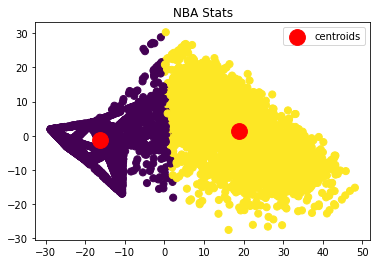

-207977.25895556525


Cluster centers: [[-16.39953763  -1.12587298]
 [ 18.77907838   1.28923494]]


Labels: [1 1 1 ... 0 0 0]


In [21]:
from sklearn.decomposition import PCA
pca_x = PCA(n_components=2).fit_transform(xtrain)
pca_x_test = PCA(n_components=2).fit_transform(xtest)
plot_kmeans(pca_x, 2, 'NBA Stats')


**Train and evaluate models**

In [22]:
def scores(model):
    
    model.fit(xtrain, ytrain.values.ravel())
    y_pred = model.predict(xtest)
    
    print("Accuracy score: %.3f" % metrics.accuracy_score(ytest, y_pred))
    print("Recall: %.3f" % metrics.recall_score(ytest, y_pred))
    print("Precision: %.3f" % metrics.precision_score(ytest, y_pred))
    print("F1: %.3f" % metrics.f1_score(ytest, y_pred))
    
    proba = model.predict_proba(xtest)
    print("Log loss: %.3f" % metrics.log_loss(ytest, proba))

    pos_prob = proba[:, 1]
    print("Area under ROC curve: %.3f" % metrics.roc_auc_score(ytest, pos_prob))
    
    cv = cross_val_score(model, xtest, ytest.values.ravel(), cv = 3, scoring = 'accuracy')
    print("Accuracy (cross validation score): %0.3f (+/- %0.3f)" % (cv.mean(), cv.std() * 2))
    
    return y_pred

In [24]:
svc = SVC(C=100, kernel='rbf', probability=True)
y_svc = scores(svc)

Accuracy score: 0.986
Recall: 0.500
Precision: 0.111
F1: 0.182
Log loss: 0.050
Area under ROC curve: 0.981
Accuracy (cross validation score): 0.997 (+/- 0.002)


In [25]:
log = LogisticRegression(C=100)
y_log = scores(log)

Accuracy score: 0.972
Recall: 0.500
Precision: 0.056
F1: 0.100
Log loss: 0.080
Area under ROC curve: 0.983
Accuracy (cross validation score): 0.994 (+/- 0.008)


In [26]:
rf = BaggingClassifier(n_estimators=75, max_features=4)
y_rf = scores(rf)

for name, mvp in zip(xtest_names['Player'], y_rf):
  if mvp == 1:
    print (name, mvp)

Accuracy score: 0.991
Recall: 0.500
Precision: 0.182
F1: 0.267
Log loss: 0.020
Area under ROC curve: 0.991
Accuracy (cross validation score): 0.995 (+/- 0.004)
Kawhi Leonard 1
Karl Malone* 1
Kobe Bryant 1
LeBron James 1
Tim Duncan 1
Dirk Nowitzki 1
James Harden 1
Kawhi Leonard 1
Sam Cassell 1
Chris Paul 1
Dirk Nowitzki 1


In [27]:
dnn = MLPClassifier(hidden_layer_sizes=(75,25), activation='tanh', learning_rate='invscaling', early_stopping=True)
y_dnn = scores(dnn)

for name, mvp in zip(xtest_names['Player'], y_dnn):
  if mvp == 1:
    print (name, mvp)

Accuracy score: 0.985
Recall: 0.500
Precision: 0.105
F1: 0.174
Log loss: 0.034
Area under ROC curve: 0.975
Accuracy (cross validation score): 0.997 (+/- 0.002)
Kawhi Leonard 1
Shawn Marion 1
Karl Malone* 1
Kobe Bryant 1
Rasheed Wallace 1
Dirk Nowitzki 1
LeBron James 1
Tim Duncan 1
LeBron James 1
Gerald Wallace 1
Chris Paul 1
James Harden 1
Stephen Curry 1
LeBron James 1
Sam Cassell 1
Shawn Marion 1
Chris Paul 1
Chauncey Billups 1
Dirk Nowitzki 1


**Predictions on withdrawn data**

In [28]:
players = withdrawn.iloc[:,1]
players.head()

25358         Steven Adams
25359          Bam Adebayo
25362    LaMarcus Aldridge
25365        Jarrett Allen
25367      Al-Farouq Aminu
Name: Player, dtype: object

In [29]:
current = withdrawn[['Tm_Wins', 'PPG', 'VORP', 'WS', 'BPM', 'PER']]

In [30]:
from operator import itemgetter

def make_pred(model):

    proba = model.predict_proba(current)
    pos_prob = proba[:, 1]
    
    combined_list = [[i, j] for i, j in zip(players, pos_prob)]
    combined_list = sorted(combined_list, key = itemgetter(1), reverse = True)
    
    for i in combined_list:
        print(i)
        
    who = model.predict(current)
    for name, mvp in zip(players, who):
      if mvp == 1:
        print ('MVP candidate:', name, mvp)
    return pos_prob

In [31]:
svc_prob = make_pred(svc)

['James Harden', 0.996687867769793]
['Giannis Antetokounmpo', 0.6656698566594189]
['Clint Capela', 0.3117265569454294]
['Kevin Durant', 0.24123062788266317]
['Damian Lillard', 0.21076738000679382]
['Rudy Gobert', 0.02392916923034759]
['Nikola Jokić', 0.005208019974942708]
['Stephen Curry', 0.004191128482156484]
['Paul George', 0.0028802786292610504]
['Pascal Siakam', 0.0013978941107583417]
['Kawhi Leonard', 0.0011039156108377157]
['LaMarcus Aldridge', 0.00018648608919044247]
['Eric Bledsoe', 6.173069101921824e-05]
['Kyrie Irving', 1.4810603557282656e-05]
['Joel Embiid', 1.0258888661408037e-05]
['Steven Adams', 7.4497160713203576e-06]
['Ben Simmons', 4.7057183297619e-06]
['Montrezl Harrell', 4.470554278518915e-06]
['Serge Ibaka', 3.843267098523128e-06]
['Jusuf Nurkić', 3.822178191678267e-06]
['Danilo Gallinari', 1.5621617627811258e-06]
['Malcolm Brogdon', 7.304634217510471e-07]
['Chris Paul', 2.3949808332603847e-07]
['Derrick Favors', 1.3839118734391415e-07]
['Domantas Sabonis', 1.01526

In [32]:
rf_prob = make_pred(rf)

['James Harden', 1.0]
['Giannis Antetokounmpo', 0.6533333333333333]
['Nikola Jokić', 0.21333333333333335]
['Kevin Durant', 0.2]
['Damian Lillard', 0.12]
['Andre Drummond', 0.10666666666666667]
['Clint Capela', 0.09333333333333334]
['Paul George', 0.09333333333333334]
['Montrezl Harrell', 0.09333333333333334]
['Pascal Siakam', 0.09333333333333334]
['Stephen Curry', 0.06666666666666667]
['Jusuf Nurkić', 0.06666666666666667]
['Anthony Davis', 0.05333333333333334]
['Mitchell Robinson', 0.05333333333333334]
['Karl-Anthony Towns', 0.05333333333333334]
['Eric Bledsoe', 0.04]
['Rudy Gobert', 0.04]
['Kawhi Leonard', 0.04]
['Malcolm Brogdon', 0.013333333333333334]
['Joel Embiid', 0.013333333333333334]
['Steven Adams', 0.0]
['Bam Adebayo', 0.0]
['LaMarcus Aldridge', 0.0]
['Jarrett Allen', 0.0]
['Al-Farouq Aminu', 0.0]
['Kyle Anderson', 0.0]
['OG Anunoby', 0.0]
['Ryan Arcidiacono', 0.0]
['Trevor Ariza', 0.0]
['D.J. Augustin', 0.0]
['Deandre Ayton', 0.0]
['Marvin Bagley', 0.0]
['Lonzo Ball', 0.0]
[

In [33]:
dnn_prob = make_pred(dnn)

['James Harden', 0.7235915029037077]
['Giannis Antetokounmpo', 0.6928878734023487]
['Damian Lillard', 0.41029371173974605]
['Rudy Gobert', 0.1990953509924271]
['Steven Adams', 0.11802901769344208]
['Nikola Jokić', 0.11151031269838695]
['Clint Capela', 0.07733920412009233]
['Kevin Durant', 0.028653958058971384]
['Paul George', 0.02713468970254036]
['Pascal Siakam', 0.019021235198917855]
['Ben Simmons', 0.008969543040702448]
['Stephen Curry', 0.00806425427549942]
['Kyrie Irving', 0.007026770348348133]
['Nikola Vučević', 0.006804030528813307]
['Jarrett Allen', 0.006101733476330276]
['Karl-Anthony Towns', 0.005092935417657171]
['Darren Collison', 0.004883054814484115]
['Montrezl Harrell', 0.004423142364284002]
['D.J. Augustin', 0.004354569781080349]
['Anthony Davis', 0.004018824197701444]
['Eric Bledsoe', 0.0038062659986552124]
['Thaddeus Young', 0.0035860788917811983]
['Al Horford', 0.0035409719495881043]
['Domantas Sabonis', 0.0033228550198958024]
['Derrick Favors', 0.0032019930090257864